In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
csv_path = '/mnt/data/Dataset .csv'


In [10]:
df = pd.read_csv('Dataset .csv',encoding='utf-8')
print("Loaded dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
df


Loaded dataset shape: (9551, 21)
Columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [11]:
print("\n--- HEAD ---")
print(df.head().T)


--- HEAD ---
                                                                      0  \
Restaurant ID                                                   6317637   
Restaurant Name                                        Le Petit Souffle   
Country Code                                                        162   
City                                                        Makati City   
Address               Third Floor, Century City Mall, Kalayaan Avenu...   
Locality                      Century City Mall, Poblacion, Makati City   
Locality Verbose      Century City Mall, Poblacion, Makati City, Mak...   
Longitude                                                    121.027535   
Latitude                                                      14.565443   
Cuisines                                     French, Japanese, Desserts   
Average Cost for two                                               1100   
Currency                                               Botswana Pula(P)   
Has Table b

In [12]:
print("\n--- INFO ---")
print(df.info())




--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch 

In [13]:
print("\nMissing values per column (count and %):")
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
print(pd.concat([missing, missing_pct], axis=1).rename(columns={0:'missing_count',1:'missing_pct'}).head(30))


Missing values per column (count and %):
                      missing_count  missing_pct
Cuisines                          9         0.09
Restaurant ID                     0         0.00
Currency                          0         0.00
Rating text                       0         0.00
Rating color                      0         0.00
Aggregate rating                  0         0.00
Price range                       0         0.00
Switch to order menu              0         0.00
Is delivering now                 0         0.00
Has Online delivery               0         0.00
Has Table booking                 0         0.00
Average Cost for two              0         0.00
Restaurant Name                   0         0.00
Latitude                          0         0.00
Longitude                         0         0.00
Locality Verbose                  0         0.00
Locality                          0         0.00
Address                           0         0.00
City                       

In [14]:
candidate_names = ['Aggregate rating','aggregate_rating','Aggregate_Rating','AggregateRating','Rating','Average Rating']
target_col = None
for name in candidate_names:
    if name in df.columns:
        target_col = name
        break

In [15]:
if target_col is None:
    possibles = [c for c in df.columns if 'rating' in c.lower() and ('agg' in c.lower() or 'aggregate' in c.lower() or True)]
    if possibles:
        # pick the most likely by exact 'aggregate' mention first
        for p in possibles:
            if 'aggregate' in p.lower():
                target_col = p
                break
        if not target_col:
            target_col = possibles[0]

print("Detected target column:", target_col)
if target_col is None:
    raise ValueError("Target column not found automatically. Edit the script and set target_col explicitly.")


Detected target column: Aggregate rating


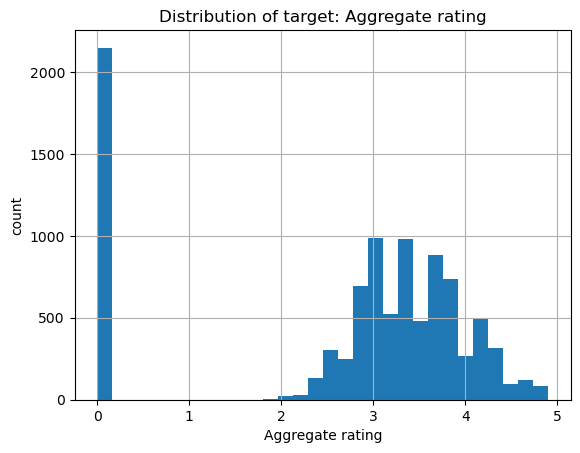

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

Top counts (if discrete):
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
Name: count, dtype: int64


In [16]:
plt.figure()
df[target_col].hist(bins=30)
plt.title(f'Distribution of target: {target_col}')
plt.xlabel(target_col)
plt.ylabel('count')
plt.show()

print(df[target_col].describe())
print("\nTop counts (if discrete):")
print(df[target_col].value_counts().head(20))


Top 10 values for Cuisines:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


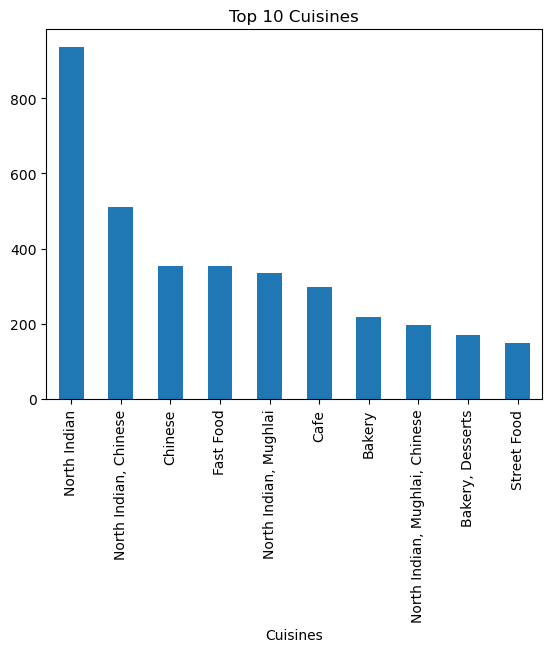


Top 10 values for City:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


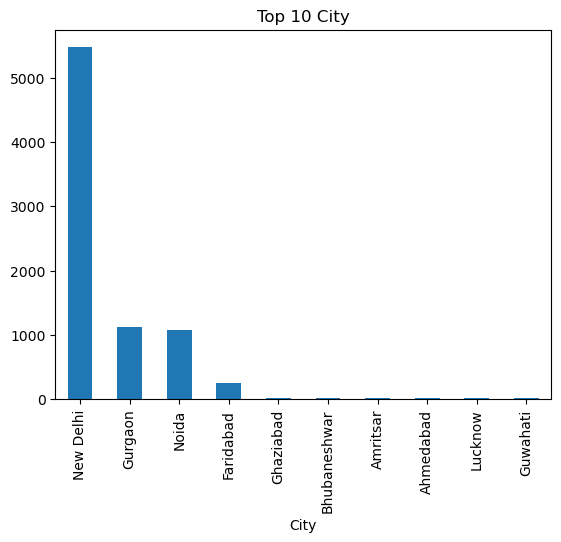


Top 10 values for Country Code:
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64


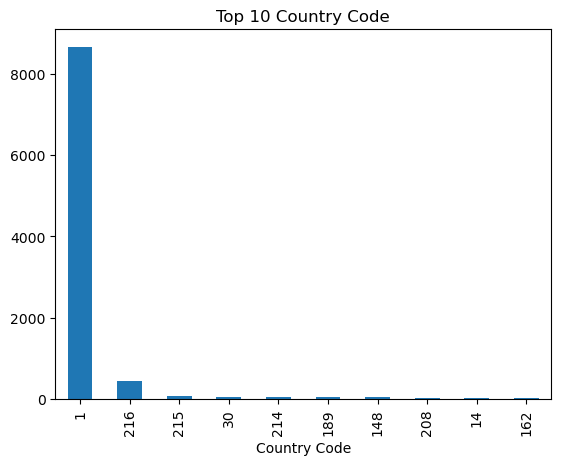

In [17]:
for col in ['Cuisines','City','Country Code','Country','City ']:
    if col in df.columns:
        print(f"\nTop 10 values for {col}:")
        print(df[col].value_counts().head(10))
        # bar plot
        plt.figure()
        df[col].value_counts().head(10).plot.bar()
        plt.title(f'Top 10 {col}')
        plt.show()

Latitude-like cols: ['Latitude']
Longitude-like cols: ['Longitude']


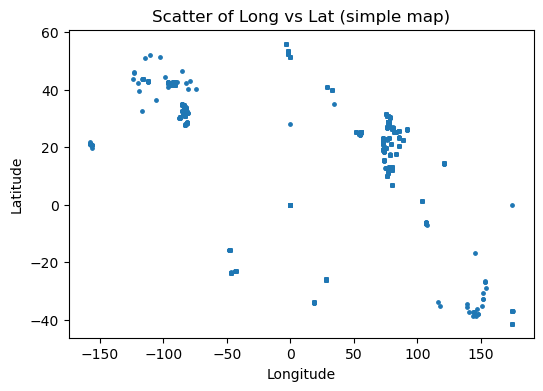

In [18]:
lat_cols = [c for c in df.columns if 'lat' in c.lower()]
lon_cols = [c for c in df.columns if 'lon' in c.lower() or 'long' in c.lower()]

print("Latitude-like cols:", lat_cols)
print("Longitude-like cols:", lon_cols)

if lat_cols and lon_cols:
    lat = lat_cols[0]
    lon = lon_cols[0]
    plt.figure(figsize=(6,4))
    plt.scatter(df[lon].dropna(), df[lat].dropna(), s=6)
    plt.title('Scatter of Long vs Lat (simple map)')
    plt.xlabel(lon); plt.ylabel(lat)
    plt.show()
else:
    print("No lat/lon columns detected. Skip geospatial plotting.")

In [19]:
df_fe = df.copy()

In [20]:
name_cols = [c for c in df_fe.columns if 'name' in c.lower()]
if name_cols:
    name_col = name_cols[0]
    df_fe['name_length'] = df_fe[name_col].astype(str).apply(len)
    print("Created 'name_length' from", name_col)


Created 'name_length' from Restaurant Name


In [21]:
addr_cols = [c for c in df_fe.columns if 'address' in c.lower() or 'location' in c.lower()]
if addr_cols:
    addr_col = addr_cols[0]
    df_fe['address_length'] = df_fe[addr_col].astype(str).apply(len)
    print("Created 'address_length' from", addr_col)

Created 'address_length' from Address


In [22]:
def make_flag(colnames):
    for c in colnames:
        if c in df_fe.columns:
            s = df_fe[c].astype(str).str.strip().str.lower()
            return s.replace({'yes':1,'no':0,'true':1,'false':0,'1':1,'0':0}).fillna(0).astype(int)
    return None

df_fe['has_table_booking'] = make_flag(['Has Table booking','Has Table Bookings','Table booking','Has Table booking?','Has Table booking '])
df_fe['has_online_delivery'] = make_flag(['Has Online delivery','Has Online Delivery','Online delivery','Has Online delivery?'])


C:\Users\nares\AppData\Local\Temp\ipykernel_24812\3292508948.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return s.replace({'yes':1,'no':0,'true':1,'false':0,'1':1,'0':0}).fillna(0).astype(int)
C:\Users\nares\AppData\Local\Temp\ipykernel_24812\3292508948.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return s.replace({'yes':1,'no':0,'true':1,'false':0,'1':1,'0':0}).fillna(0).astype(int)


In [23]:
print("\nEngineered features example:")
print(df_fe[[c for c in ['name_length','address_length','has_table_booking','has_online_delivery'] if c in df_fe.columns]].head())



Engineered features example:
   name_length  address_length  has_table_booking  has_online_delivery
0           16              71                  1                    0
1           16              67                  1                    0
2           22              56                  1                    0
3            4              70                  0                    0
4           11              64                  1                    0


In [24]:
df_model = df_fe[df_fe[target_col].notna()].copy()
print("Rows after dropping target-missing:", df_model.shape)

Rows after dropping target-missing: (9551, 25)


In [25]:
candidate_features = []

In [26]:
for c in ['Votes','votes','name_length','address_length','has_table_booking','has_online_delivery','Price range','price range','Price_range','Votes']:
    if c in df_model.columns:
        candidate_features.append(c)


In [27]:
for c in ['City','Cuisines','Country Code','Country','Rating color','Price range']:
    if c in df_model.columns and c not in candidate_features:
        candidate_features.append(c)


In [28]:
if not candidate_features:
    candidate_features = [c for c in df_model.columns if c != target_col][:6]

print("Using feature columns:", candidate_features)

X = df_model[candidate_features].copy()
y = df_model[target_col].astype(float).copy()


Using feature columns: ['Votes', 'name_length', 'address_length', 'has_table_booking', 'has_online_delivery', 'Price range', 'Votes', 'City', 'Cuisines', 'Country Code', 'Rating color']


In [29]:
if 'Cuisines' in X.columns:
    print("Unique cuisines:", X['Cuisines'].nunique())


Unique cuisines: 1825


In [46]:
for col in X.columns:
    try:
        X[col] = pd.to_numeric(X[col])
    except:
        pass


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['Votes', 'name_length', 'address_length', 'has_table_booking', 'has_online_delivery', 'Price range', 'Votes', 'Country Code']
Categorical columns: ['City', 'Cuisines', 'Rating color']


In [42]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Linear Regression pipeline
lr_pipeline = Pipeline([
    ('pre', preprocessor),
    ('model', LinearRegression())
])

In [43]:
rf_pipeline = Pipeline([
    ('pre', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

In [49]:
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


In [51]:
OneHotEncoder(handle_unknown='ignore', sparse_output=False)


OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [53]:
print("Columns in X_train:", X_train.columns.tolist())


Columns in X_train: ['Votes', 'name_length', 'address_length', 'has_table_booking', 'has_online_delivery', 'Price range', 'Votes', 'City', 'Cuisines', 'Country Code', 'Rating color']


In [56]:
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


In [58]:
print(X_train.columns)
print(X_train.dtypes)


Index(['Votes', 'name_length', 'address_length', 'has_table_booking',
       'has_online_delivery', 'Price range', 'Votes', 'City', 'Cuisines',
       'Country Code', 'Rating color'],
      dtype='object')
Votes                   int64
name_length             int64
address_length          int64
has_table_booking       int32
has_online_delivery     int32
Price range             int64
Votes                   int64
City                   object
Cuisines               object
Country Code            int64
Rating color           object
dtype: object


In [61]:
# FIX: Remove duplicate column names
X_train = X_train.loc[:, ~X_train.columns.duplicated()].copy()
X_test  = X_test.loc[:, ~X_test.columns.duplicated()].copy()

print("After removing duplicates:", X_train.columns.tolist())


After removing duplicates: ['Votes', 'name_length', 'address_length', 'has_table_booking', 'has_online_delivery', 'Price range', 'City', 'Cuisines', 'Country Code', 'Rating color']


In [62]:
print("\nTraining Linear Regression...")
lr_pipeline.fit(X_train, y_train)
print("Training Random Forest...")
rf_pipeline.fit(X_train, y_train)



Training Linear Regression...
Training Random Forest...


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Votes', 'name_length',
                                                   'address_length',
                                                   'has_table_booking',
                                                   'has_online_delivery',
                                                   'Price range', 'Votes',
                                                   'Country Code']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City', 'Cuisines',
                                                   'Rating color'])])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [63]:
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)


In [66]:
def metrics(y_true, y_pred):
    return {
        'MSE': mean_squared_error(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }
   

m_lr = metrics(y_test, y_pred_lr)
m_rf = metrics(y_test, y_pred_rf)

print("\nLinear Regression metrics:", m_lr)
print("Random Forest metrics:", m_rf)


Linear Regression metrics: {'MSE': 0.03415492920647917, 'MAE': 0.13668111732323318, 'R2': 0.9849941591760792}
Random Forest metrics: {'MSE': 0.030216688271992528, 'MAE': 0.11717413221698932, 'R2': 0.9867244106496482}


In [67]:
comp = pd.DataFrame({'actual': y_test, 'pred_lr': y_pred_lr, 'pred_rf': y_pred_rf}).reset_index(drop=True)
print(comp.head(15))


    actual   pred_lr  pred_rf
0      2.1  2.298684    2.321
1      4.1  4.068997    4.068
2      3.2  3.016477    3.061
3      4.4  4.062501    4.083
4      3.5  3.612883    3.508
5      0.0  0.023024    0.000
6      3.2  3.039279    3.070
7      0.0  0.026707    0.000
8      3.6  3.570344    3.634
9      4.0  4.064423    4.051
10     3.9  3.677281    3.581
11     0.0  0.009298    0.000
12     4.2  4.148119    4.110
13     0.0  0.048623    0.000
14     2.6  3.041423    3.004


In [68]:
df_fe.to_csv('processed_dataset_with_features.csv', index=False)
print("Saved processed dataset to 'processed_dataset_with_features.csv' in working directory.")

Saved processed dataset to 'processed_dataset_with_features.csv' in working directory.


In [69]:
print("Linear Regression:", metrics(y_test, y_pred_lr))
print("Random Forest:", metrics(y_test, y_pred_rf))

Linear Regression: {'MSE': 0.03415492920647917, 'MAE': 0.13668111732323318, 'R2': 0.9849941591760792}
Random Forest: {'MSE': 0.030216688271992528, 'MAE': 0.11717413221698932, 'R2': 0.9867244106496482}


In [78]:
'feature_importances' in locals()  # True if defined in current scope


False

In [81]:
import pandas as pd

# X_train is your DataFrame
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns to make sure train and test match
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [82]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_model = RandomForestRegressor()
rf_model.fit(X_train_encoded, y_train)

feature_importances = rf_model.feature_importances_
all_feature_names = X_train_encoded.columns

# Now plotting will work
feature_importances = np.array(feature_importances)


In [84]:
top_n = 10
indices = indices[:top_n]
feature_labels = [all_feature_names[i] for i in indices]
feature_values = feature_importances[indices]


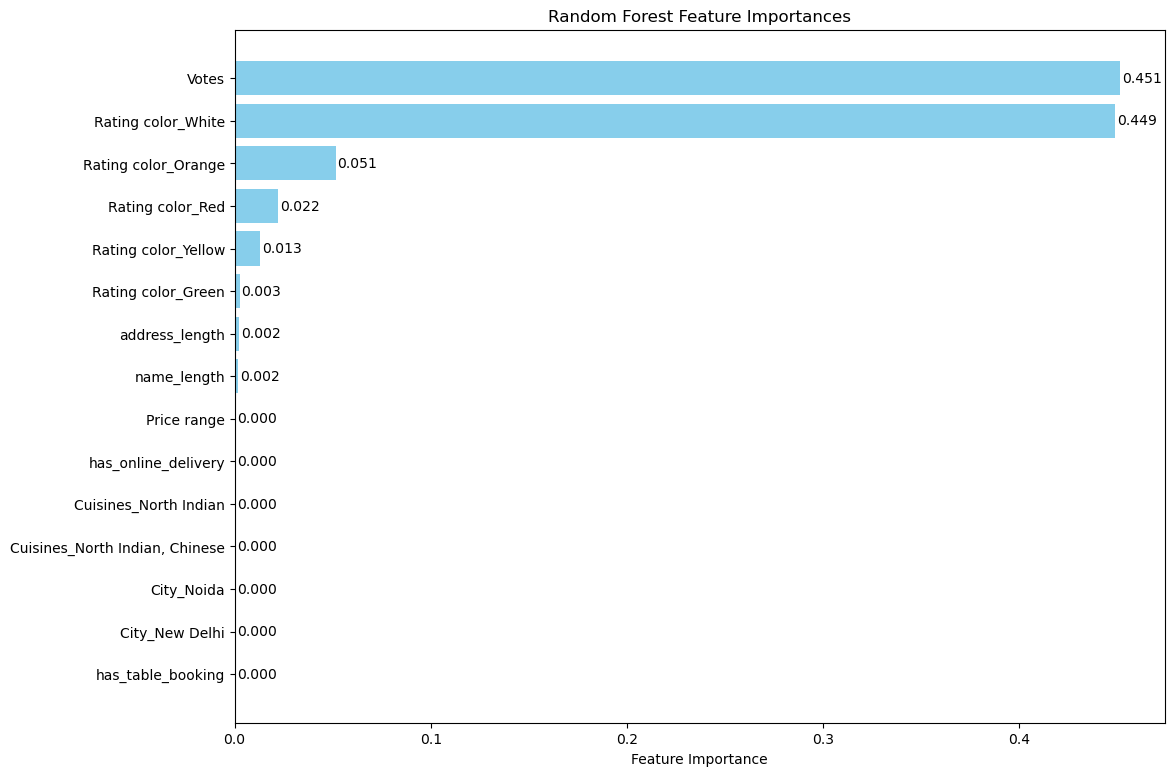

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Sort features by importance descending
indices = np.argsort(feature_importances)[::-1]

# Optional: show only top N features
top_n = 15  # adjust as needed
indices = indices[:top_n]

feature_labels = [all_feature_names[i] for i in indices]
feature_values = feature_importances[indices]

# Make plot taller
plt.figure(figsize=(12, top_n * 0.6))  # height scales with number of bars
plt.barh(range(len(indices)), feature_values, color='skyblue')
plt.yticks(range(len(indices)), feature_labels)
plt.gca().invert_yaxis()  # most important on top
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")

# Add values next to bars
for i, v in enumerate(feature_values):
    plt.text(v + 0.001, i, f"{v:.3f}", va='center')

plt.show()


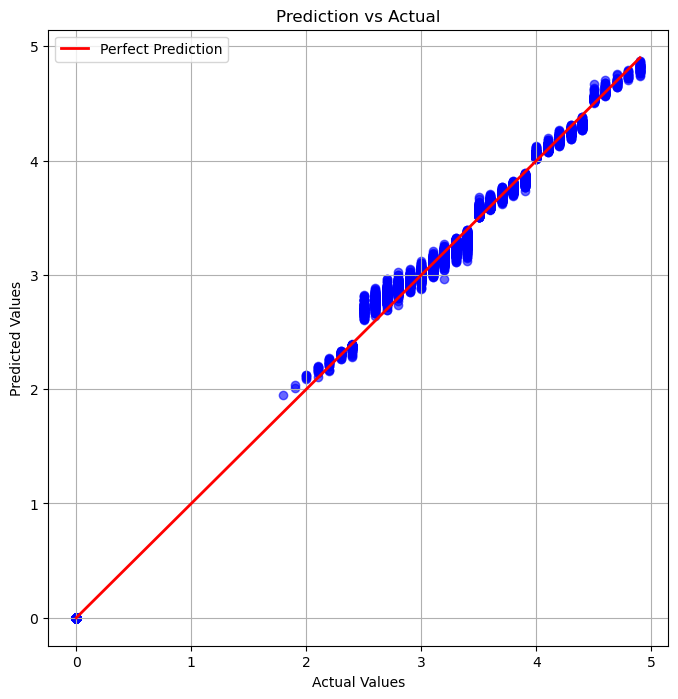

In [87]:
import matplotlib.pyplot as plt

# Assuming your predictions and actual values
y_pred = rf_model.predict(X_train_encoded)  # or your test set predictions
y_actual = y_train  # or y_test

plt.figure(figsize=(8, 8))
plt.scatter(y_actual, y_pred, color='blue', alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         color='red', linewidth=2, label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual")
plt.legend()
plt.grid(True)
plt.show()


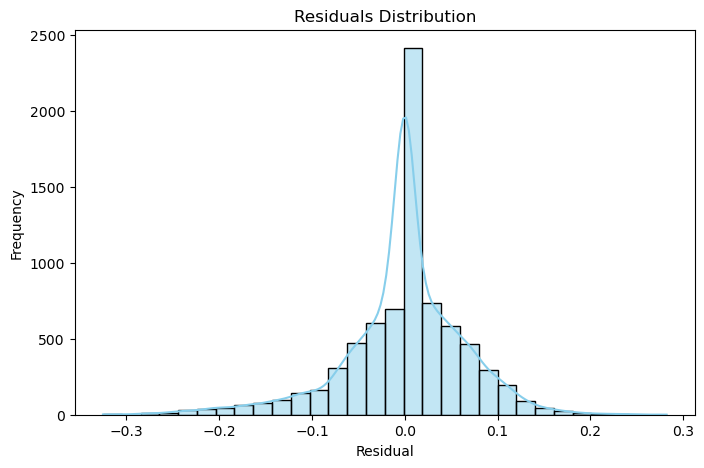

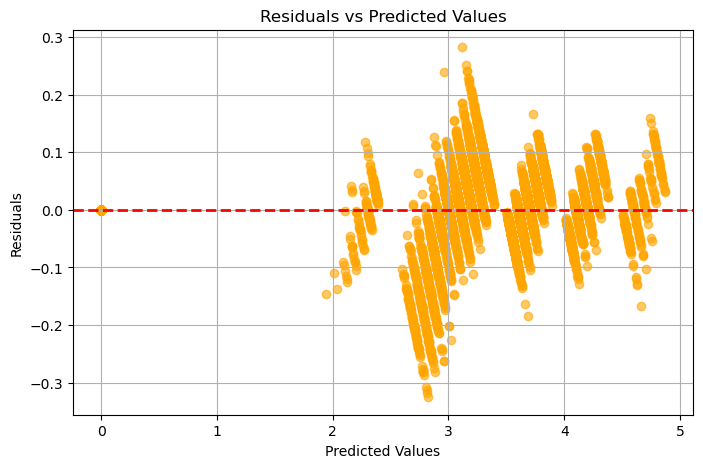

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_actual - y_pred  # use y_test and predictions if testing

# 1. Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='skyblue', bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# 2. Residuals vs Predicted plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='orange', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()


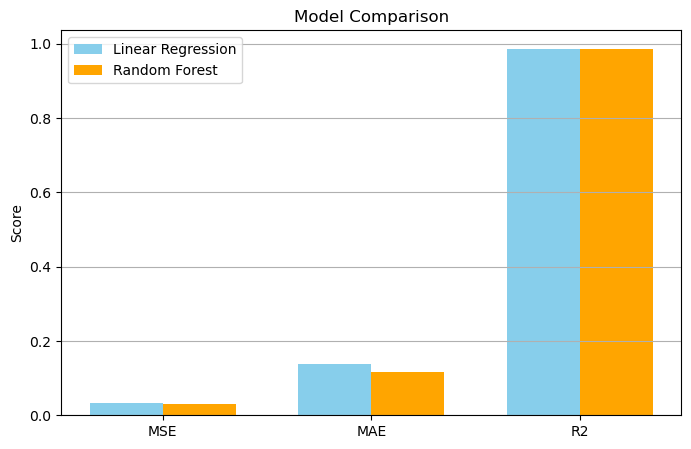

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics
metrics = ['MSE', 'MAE', 'R2']
linear_metrics = [0.034, 0.137, 0.985]       # replace with your actual results
rf_metrics = [0.030, 0.117, 0.987]           # replace with your actual results

x = np.arange(len(metrics))  # metric positions
width = 0.35  # bar width

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, linear_metrics, width, label='Linear Regression', color='skyblue')
plt.bar(x + width/2, rf_metrics, width, label='Random Forest', color='orange')

plt.ylabel("Score")
plt.title("Model Comparison")
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y')
plt.show()
